In [14]:
from selenium import webdriver
from bs4 import BeautifulSoup
from pprint import pprint
import requests
import pandas as pd
from tqdm import tqdm
import time
pd.options.display.max_rows = None
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

# array 결과 다 나오게 하기
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

In [3]:
review10 = pd.read_csv("osaka_review1-10.csv")
review10.head()

name  rating                 id  \
0  HOTEL THE FLAG Shinsaibashi       5       Lovecathcath   
1  HOTEL THE FLAG Shinsaibashi       5        AnthonyChng   
2  HOTEL THE FLAG Shinsaibashi       5            Jacek B   
3  HOTEL THE FLAG Shinsaibashi       5            Jayd822   
4  HOTEL THE FLAG Shinsaibashi       5  Harald Gracholski   

                country                             title  \
0      Hong Kong, China                 2分鐘直達心齋橋~最近心齋橋嘅酒店   
1  Singapore, Singapore              Second Time in Osaka   
2      Katowice, Poland       Amazing hotel, lovely staff   
3                    SA                 Highly recommend!   
4      Cologne, Germany  Best possible location in Osaka!   

                                              review                    type  \
0  2分鐘直達心齋橋~最近心齋橋嘅酒店  今次同大家介紹呢間酒店非常之近心齋橋， 酒店名「HOT...    Traveled with family   
1  Great stay, everything is new and nice. Bath i...    Traveled with family   
2  Our stay at this hotel was one of the best we'...    Traveled as a couple   
3  Really enjoyed our stay at this modern funky h...   Traveled with friends   
4  The Flag in Shinsaibashi was probably the most...                     NaN   

  translation  votes   date of stay  
0           G  242.0  December 2022  
1         NaN    4.0  December 2022  
2         NaN    NaN  November 2022  
3         NaN   79.0  February 2020  
4         NaN  529.0  November 2019

In [18]:
review10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4091 entries, 0 to 4090
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4091 non-null   object 
 1   rating        4091 non-null   int64  
 2   id            4034 non-null   object 
 3   country       2836 non-null   object 
 4   title         4091 non-null   object 
 5   review        4091 non-null   object 
 6   type          62 non-null     object 
 7   translation   4091 non-null   object 
 8   votes         3507 non-null   float64
 9   date of stay  4091 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 319.7+ KB


In [17]:
review10['name'].unique()

array(['HOTEL THE FLAG Shinsaibashi', 'Conrad Osaka',
       'Hotel Universal Port Vita', 'Fraser Residence Nankai Osaka',
       'InterContinental Hotel Osaka', 'The Bridge Hotel Shinsaibashi',
       'karaksa hotel Osaka Namba', 'Marriott Osaka Miyako Hotel',
       'Imperial Hotel Osaka', 'Cross Hotel Osaka'], dtype=object)

### 호텔 순위 (from tripadvisor) 추가하기

In [4]:
rank = []
for i in review10['name']:
    if i == 'HOTEL THE FLAG Shinsaibashi':
        rank.append(1)
    elif i == 'Conrad Osaka':
        rank.append(2)
    elif i == 'Hotel Universal Port Vita':
        rank.append(3)
    elif i == 'Fraser Residence Nankai Osaka':
        rank.append(4)
    elif i == 'InterContinental Hotel Osaka':
        rank.append(5)
    elif i == 'The Bridge Hotel Shinsaibashi':
        rank.append(6)
    elif i == 'karaksa hotel Osaka Namba':
        rank.append(7)
    elif i == 'Marriott Osaka Miyako Hotel':
        rank.append(8)
    elif i == 'Imperial Hotel Osaka':
        rank.append(9)
    elif i == 'Cross Hotel Osaka':
        rank.append(10)        
    else : 
        rank.append(11)


In [5]:
review10['ranking'] = rank
review10.tail(10)

name  rating           id                 country  \
4081  Cross Hotel Osaka       5  heitung1215        Hong Kong, China   
4082  Cross Hotel Osaka       5     apolla76            Milan, Italy   
4083  Cross Hotel Osaka       5      Emily L                     NaN   
4084  Cross Hotel Osaka       4         TOKD       Gwelup, Australia   
4085  Cross Hotel Osaka       5  Bordenave F    Dover, New Hampshire   
4086  Cross Hotel Osaka       5         大大大寶                  Taipei   
4087  Cross Hotel Osaka       5      Akemi K          Mishima, Japan   
4088  Cross Hotel Osaka       5       LDLDLD        Hong Kong, China   
4089  Cross Hotel Osaka       4     angieyca  London, United Kingdom   
4090  Cross Hotel Osaka       5       Sihwee    Singapore, Singapore   

                                   title  \
4081                              超方便的酒店   
4082                    Ottima soluzione   
4083            Perfect central location   
4084                        Comfortable    
4085                         Great Hotel   
4086                      可以從房間直接看到固利果先生   
4087                             次の機会もぜひ   
4088   Very convenient and great service   
4089  Perfect location and spacious room   
4090               Excellent experience    

                                                 review type translation  \
4081  酒店位置十分方便,房間不大,但很乾淨,對面就是激安商場,而且鄰近心齋橋,有很多不同食店,行去...  NaN           G   
4082  dopo tokyo e kyoto abbiamo soggiornato due not...  NaN           G   
4083  My boyfriend and I stayed in this hotel in Nov...  NaN         NaN   
4084  We stayed for 4 nights. The bed was a bit smal...  NaN         NaN   
4085  I was a participant in the Osaka Marathon and ...  NaN         NaN   
4086  房間窗戶一打開就是跟固利果先生面對面，別人要特地看的景點，從窗戶就可以看到，飯店到心齋橋只需...  NaN           G   
4087  今まで、いろいろな大阪のホテルを使ってきましたが、その中でも立地と設備が抜群にいいです。他に...  NaN           G   
4088  Very nice boutique hotel. Excellent location, ...  NaN         NaN   
4089  First time visiting Osaka and we're so pleased...  NaN         NaN   
4090  My Boyfriend and I stayed at Cross Hotel for 5...  NaN         NaN   

      votes   date of stay  ranking  
4081    8.0     March 2017       10  
4082    5.0   January 2018       10  
4083   34.0  November 2017       10  
4084   44.0   January 2018       10  
4085    NaN  November 2017       10  
4086   26.0  February 2017       10  
4087   17.0  December 2017       10  
4088   62.0  December 2017       10  
4089  140.0  December 2017       10  
4090    5.0  December 2017       10

### translation 컬럼 결측값 문자 'E'로 채우기

In [6]:
review10['translation']=review10['translation'].fillna('E')

In [7]:
review10.tail(10)

name  rating           id                 country  \
4081  Cross Hotel Osaka       5  heitung1215        Hong Kong, China   
4082  Cross Hotel Osaka       5     apolla76            Milan, Italy   
4083  Cross Hotel Osaka       5      Emily L                     NaN   
4084  Cross Hotel Osaka       4         TOKD       Gwelup, Australia   
4085  Cross Hotel Osaka       5  Bordenave F    Dover, New Hampshire   
4086  Cross Hotel Osaka       5         大大大寶                  Taipei   
4087  Cross Hotel Osaka       5      Akemi K          Mishima, Japan   
4088  Cross Hotel Osaka       5       LDLDLD        Hong Kong, China   
4089  Cross Hotel Osaka       4     angieyca  London, United Kingdom   
4090  Cross Hotel Osaka       5       Sihwee    Singapore, Singapore   

                                   title  \
4081                              超方便的酒店   
4082                    Ottima soluzione   
4083            Perfect central location   
4084                        Comfortable    
4085                         Great Hotel   
4086                      可以從房間直接看到固利果先生   
4087                             次の機会もぜひ   
4088   Very convenient and great service   
4089  Perfect location and spacious room   
4090               Excellent experience    

                                                 review type translation  \
4081  酒店位置十分方便,房間不大,但很乾淨,對面就是激安商場,而且鄰近心齋橋,有很多不同食店,行去...  NaN           G   
4082  dopo tokyo e kyoto abbiamo soggiornato due not...  NaN           G   
4083  My boyfriend and I stayed in this hotel in Nov...  NaN           E   
4084  We stayed for 4 nights. The bed was a bit smal...  NaN           E   
4085  I was a participant in the Osaka Marathon and ...  NaN           E   
4086  房間窗戶一打開就是跟固利果先生面對面，別人要特地看的景點，從窗戶就可以看到，飯店到心齋橋只需...  NaN           G   
4087  今まで、いろいろな大阪のホテルを使ってきましたが、その中でも立地と設備が抜群にいいです。他に...  NaN           G   
4088  Very nice boutique hotel. Excellent location, ...  NaN           E   
4089  First time visiting Osaka and we're so pleased...  NaN           E   
4090  My Boyfriend and I stayed at Cross Hotel for 5...  NaN           E   

      votes   date of stay  ranking  
4081    8.0     March 2017       10  
4082    5.0   January 2018       10  
4083   34.0  November 2017       10  
4084   44.0   January 2018       10  
4085    NaN  November 2017       10  
4086   26.0  February 2017       10  
4087   17.0  December 2017       10  
4088   62.0  December 2017       10  
4089  140.0  December 2017       10  
4090    5.0  December 2017       10

### country, city 나누기 (country 컬럼)

In [59]:
for i in review10['country']:
    print(str(i).split(', ')[-1])

China
Singapore
Poland
SA
Germany
United Kingdom
nan
Australia
Australia
The Netherlands
Spain
Taiwan
Australia
Belgium
New Zealand
Australia
California
Australia
nan
Sydney
nan
New York
Australia
Indonesia
New Zealand
nan
Canada
Australia
China
United Kingdom
California
Canada
Italy
California
France
Indonesia
Australia
Virginia
Australia
nan
SP
Singapore
China
Singapore
nan
Japan
Singapore
Singapore
Australia
France
Philippines
Spain
texas
Japan
Japan
nan
Suffolk
Australia
France
Japan
Finland
Luxembourg
Washington
United Kingdom
Australia
Australia
United States
Singapore
Australia
nan
Switzerland
France
Australia
Australia
Singapore
Mariana Islands
orlando florida
nan
Belgium
United Kingdom
The Netherlands
United Kingdom
Georgia
Israel
RJ
Israel
Australia
New Zealand
United Kingdom
Australia
Sydney
Texas
South Wales
Hawaii
San Diego
Australia
United Kingdom
Switzerland
Germany
New Zealand
Washington
Hong Kong
Aussie
Australia
Australia
Australia
nan
london
Japan
nan
France
Australi

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Japan
Japan
Japan
Japan
nan
nan
nan
nan
nan
Japan
Japan
nan
nan
nan
Japan
nan
Italy
nan
Japan
Japan
nan
nan
nan
nan
nan
nan
nan
Japan
nan
nan
nan
nan
Japan
nan
nan
nan
nan
nan
nan
nan
Japan
nan
Japan
Japan
nan
Singapore
nan
nan
nan
nan
nan
nan
nan
Ohio
Japan
Japan
Japan
Japan
Italy
Japan
Japan
nan
nan
Japan
Singapore
California
Australia
nan
nan
Singapore
nan
Singapore
Singapore
Singapore
nan
Singapore
Australia
China
nan
Singapore
Singapore
nan
Malaysia
nan
Australia
China
nan
China
Thailand
nan
Singapore
China
nan
Singapore
Singapore
Singapore
Japan
nan
Singapore
Singapore
Philippines
Toronto
Singapore
nan
China
nan
nan
Indiana
Japan
nan
nan
nan
nan
Japan
nan
Vietnam
Japan
Thailand
nan
Japan
Japan
nan
Japan
nan
Japan
nan
Japan
Japan
Japan
nan
nan
nan
nan
nan
nan
nan
Japan
ケルン
nan
nan
Singapore
nan
nan
Australia
Singapore
China
nan
Philippines
Thailand
nan
HONG KONG
Philippines
Malaysia
Singapore
nan
Singapore
Singapore
Singapore
nan
United 

North Carolina
California
Japan
Germany
Qatar
Japan
nan
nan
The Netherlands
Florida
Japan
Michigan
Japan
United States
Japan
United Kingdom
USA
Maryland
nan
Japan
Tokyo
Taiwan
Michigan
Italy
日本
Japan
Japan
Canada
Taipei
nan
Japan
nan
Melbourne
Japan
nan
Japan
nan
Japan
China
Japan
Japan
nan
nan
nan
Japan
Malaysia
nan
nan
Canada
Japan
Switzerland
nan
nan
Japan
California
Australia
Japan
nan
China
nan
nan
United Arab Emirates
Canada
Taiwan
Japan
United Kingdom
United Kingdom
nan
nan
nan
Massachusetts
nan
nan
Japan
South Korea
Japan
nan
Australia
Japan
Australia
Angra do Heroismo
California
China
Japan
nan
New Taipei
Japan
nan
Japan
Taipei
nan
Singapore
nan
Japan
sapporo
Japan
Japan
Japan
Japan
nan
Japan
Taipei
nan
nan
Derbyshire
Taiwan
Canada
Ireland
Japan
nan
China
Japan
South Korea
Australia
nan
Australia
Japan
nan
nan
Japan
nan
New Zealand
愛知県
Maryland
China
Tokyo
nan
Japan
Japan
nan
Taiwan
Hong Kong
nan
nan
Taiwan
nan
Canada
Zurich
Thailand
Monaco
Japan
Japan
Hong Kong
Japan
宮崎
Singa

In [8]:
US = ['California','Washington','New York', 'Virginia', 'texas', 'United States', 'Mariana Islands', 'orlando florida', 'Texas',
     'Hawaii', 'San Diego', 'atlanta', 'Maryland', 'Pennsylvania', 'Oklahoma', 'CT', 'Ohio', 'Florida', 'Illinois', 'CONCORD',
     'Minnesota', 'District of Columbia', 'Nevada', 'Tennessee', 'Alabama', 'WA', 'Georgia', 'Colorado', 'Connecticut', 'NYC',
     'District of Columbia', 'Ridgewood NJ', 'New Jersey', 'Arizona', 'North Carolina', 'North Carolina', 'Sarasota Florida',
     'Nebraska', 'Kansas', 'ct', 'Kentucky', 'ny', 'IN', 'D.C.', 'Massachusetts', 'Arlington', 'CA', 'San Antonio', 'USA', 'AZ',
     'Los Angeles', 'Michigan', 'Louisiana', 'Las Vegas', 'san francisco', 'Portland', 'Missouri', 'NJ', 'Orlando', 'Florida',
     'los angeles', 'La Mirada', 'washington', 'Utah', 'guam', 'New Mexico', 'Newport Beach', 'Nelson', 'or', 'New Hampshire',
     'Kurtistown', 'Wisconsin', 'Oregon', 'NY', 'South Carolina', 'Pleasanton', 'Iowa', 'highland park il', 'North America',
     'San Francisco', 'Indiana']
CANADA = ['Courtenay,B.C.', 'Calgary', 'Montreal', 'Toronto'] # Canada
BRAZIL = ['RJ', 'SP', 'DF']
SWISS = ['Zurich', 'Lausanne', 'Genf'] # Switzerland
TAIWAN = ['Pingtung', 'Taipei', 'New Taipei', 'Hsinchu County', 'Tainan', 'Taichung', 'Kaohsiung', '台湾'] # Taiwan
NETHER = ['The Netherlands', 'St Martin / St Maarten']
AUST = ['Aussie', 'Glebe', 'Hervey Bay', 'Canberra', 'Sydney', 'Frenchville', 'Brisbane', 'Victoria Australia', 'Melbourne',
       'Adelaide', 'SA', 'australia'] # Australia
JAPAN = ['広島県三原市','ｔｏｋｙｏ', '大阪', '横浜', 'NAGOYA', 'tokyo', '兵庫県', '柏市', '福岡', '愛知県', '神奈川県', '沖縄',
        '東京都', 'ケルン', 'Osaka', '名古屋', '東京', '埼玉', 'Tokyo', 'sapporo', '愛知県', '宮崎', 'Yokohama', '淡路市', '神奈川',
        '兵庫県', '京都', '大阪府', '岸和田市', '京都市', '豊橋', '日本', '関西', '米子市', '和歌山県', '大阪市','三重' '栃木',
        '大阪市中央区船越町', '徳島', '広島県', '福岡県', '高知市', 'osaka', '栃木', '三重', '倉敷市中島', '奈良', '港区麻布十番',
        '静岡県', '岐阜', '町田市', '千葉県']
GERMANY = ['D', 'Munich', 'Bad Homburg', 'Baden']
FRANCE = ['Paris', 'bora bora', 'パリ', 'paris'] # France
SCOTLAND = ['Falkirk', 'Glasgow', 'Portree'] # Scotland
UK = ['West midlands uk', 'Ramsbottom', 'England', 'London', 'Derbyshire', 'Newcastle', 'Bristol', 'Kiwi in London',
     'Suffolk', 'london', 'Northants', 'South Wales', 'uk'] # United Kingdom
Belgium = ['Belgique', 'Alleur']
SK = ['서울', 'Seoul', 'seoul'] # South Korea
CHINA = ['PEK'] # China
HK = ['HONG KONG', 'sai kung', 'HK', 'Kowloon', 'Hong kong', 'Hk', 'hong kong'] # Hong Kong
SPAIN = ['Madrid'] # Spain
MALATSIA = ['malaysia', 'KUL'] # Malaysia
THAILAND = ['Bangkok', 'bangkok'] # Thailand
INDONESIA = ['Jakarta'] # Indonesia
ISRAEL = ['tel aviv'] # Israel
PHILIPPINES = ['Caloocan', 'philippines', 'Manila'] # Philippines
PORTUGAL = ['Angra do Heroismo'] # Portugal
KENYA = ['Nairobi'] # Kenya
CUBA = ['Havana'] # Cuba
TURKEY = ['Türkiye'] # Turkey
ITALY = ['mantova'] # Italy
SINGAPORE = ['singapore']


unknown = ['abson168', 'Antigua', 'YYZ', 'Somewhere else', 'PJ', 'Kuwait']


In [9]:
country2 = []

for i in review10['country']:
    c = str(i).split(', ')[-1]
    if c in US:
        country2.append('USA')
    elif c in CANADA:
        country2.append('Canada')
    elif c in BRAZIL:
        country2.append('Brazil')
    elif c in SWISS:
        country2.append('Switzerland')
    elif c in TAIWAN:
        country2.append('Taiwan')
    elif c in NETHER:
        country2.append('Netherland')
    elif c in AUST:
        country2.append('Australia')
    elif c in JAPAN:
        country2.append('Japan')
    elif c in GERMANY:
        country2.append('Germany')
    elif c in FRANCE:
        country2.append('France')
    elif c in SCOTLAND:
        country2.append('Scotland')
    elif c in UK:
        country2.append('United Kingdom')
    elif c in Belgium:
        country2.append('Belgium')
    elif c in SK:
        country2.append('South Korea')
    elif c in CHINA:
        country2.append('China')
    elif c in HK:
        country2.append('Hong Kong')
    elif c in SPAIN:
        country2.append('Spain')
    elif c in MALATSIA:
        country2.append('Malaysia')
    elif c in THAILAND:
        country2.append('Thailand')
    elif c in INDONESIA:
        country2.append('Indonesia')
    elif c in ISRAEL:
        country2.append('Israel')
    elif c in PHILIPPINES:
        country2.append('Philippines')
    elif c in PORTUGAL:
        country2.append('Portugal')
    elif c in KENYA:
        country2.append('Kenya')
    elif c in CUBA:
        country2.append('Cuba')
    elif c in TURKEY:
        country2.append('Turkey')
    elif c in ITALY:
        country2.append('Italy')
    elif c in SINGAPORE:
        country2.append('Singapore')

    else:
        country2.append(c)
        


In [10]:
review10['country2']=country2
review10.tail(10)

name  rating           id                 country  \
4081  Cross Hotel Osaka       5  heitung1215        Hong Kong, China   
4082  Cross Hotel Osaka       5     apolla76            Milan, Italy   
4083  Cross Hotel Osaka       5      Emily L                     NaN   
4084  Cross Hotel Osaka       4         TOKD       Gwelup, Australia   
4085  Cross Hotel Osaka       5  Bordenave F    Dover, New Hampshire   
4086  Cross Hotel Osaka       5         大大大寶                  Taipei   
4087  Cross Hotel Osaka       5      Akemi K          Mishima, Japan   
4088  Cross Hotel Osaka       5       LDLDLD        Hong Kong, China   
4089  Cross Hotel Osaka       4     angieyca  London, United Kingdom   
4090  Cross Hotel Osaka       5       Sihwee    Singapore, Singapore   

                                   title  \
4081                              超方便的酒店   
4082                    Ottima soluzione   
4083            Perfect central location   
4084                        Comfortable    
4085                         Great Hotel   
4086                      可以從房間直接看到固利果先生   
4087                             次の機会もぜひ   
4088   Very convenient and great service   
4089  Perfect location and spacious room   
4090               Excellent experience    

                                                 review type translation  \
4081  酒店位置十分方便,房間不大,但很乾淨,對面就是激安商場,而且鄰近心齋橋,有很多不同食店,行去...  NaN           G   
4082  dopo tokyo e kyoto abbiamo soggiornato due not...  NaN           G   
4083  My boyfriend and I stayed in this hotel in Nov...  NaN           E   
4084  We stayed for 4 nights. The bed was a bit smal...  NaN           E   
4085  I was a participant in the Osaka Marathon and ...  NaN           E   
4086  房間窗戶一打開就是跟固利果先生面對面，別人要特地看的景點，從窗戶就可以看到，飯店到心齋橋只需...  NaN           G   
4087  今まで、いろいろな大阪のホテルを使ってきましたが、その中でも立地と設備が抜群にいいです。他に...  NaN           G   
4088  Very nice boutique hotel. Excellent location, ...  NaN           E   
4089  First time visiting Osaka and we're so pleased...  NaN           E   
4090  My Boyfriend and I stayed at Cross Hotel for 5...  NaN           E   

      votes   date of stay  ranking        country2  
4081    8.0     March 2017       10           China  
4082    5.0   January 2018       10           Italy  
4083   34.0  November 2017       10             nan  
4084   44.0   January 2018       10       Australia  
4085    NaN  November 2017       10             USA  
4086   26.0  February 2017       10          Taiwan  
4087   17.0  December 2017       10           Japan  
4088   62.0  December 2017       10           China  
4089  140.0  December 2017       10  United Kingdom  
4090    5.0  December 2017       10       Singapore

In [15]:
tail10.columns

Index(['name', 'rating', 'id', 'country', 'title', 'review', 'type',
       'translation', 'votes', 'date of stay', 'ranking', 'country2'],
      dtype='object')

In [11]:
# 컬럼 순서 변경

review10 = review10[['name', 'rating', 'id', 'country', 'country2', 'title', 'review', 'type',
       'translation', 'votes', 'date of stay', 'ranking']]
review10.head(20)

name  rating                   id  \
0   HOTEL THE FLAG Shinsaibashi       5         Lovecathcath   
1   HOTEL THE FLAG Shinsaibashi       5          AnthonyChng   
2   HOTEL THE FLAG Shinsaibashi       5              Jacek B   
3   HOTEL THE FLAG Shinsaibashi       5              Jayd822   
4   HOTEL THE FLAG Shinsaibashi       5    Harald Gracholski   
5   HOTEL THE FLAG Shinsaibashi       5            Librilisa   
6   HOTEL THE FLAG Shinsaibashi       5              Jason S   
7   HOTEL THE FLAG Shinsaibashi       5                  J M   
8   HOTEL THE FLAG Shinsaibashi       5             Danielle   
9   HOTEL THE FLAG Shinsaibashi       5               Sndr23   
10  HOTEL THE FLAG Shinsaibashi       5        Juan Carlos P   
11  HOTEL THE FLAG Shinsaibashi       5              Miu Miu   
12  HOTEL THE FLAG Shinsaibashi       5            Philter C   
13  HOTEL THE FLAG Shinsaibashi       5            VeronicaN   
14  HOTEL THE FLAG Shinsaibashi       5               NZShaz   
15  HOTEL THE FLAG Shinsaibashi       5                Mal V   
16  HOTEL THE FLAG Shinsaibashi       5            linmoncha   
17  HOTEL THE FLAG Shinsaibashi       5  Michael B Traveller   
18  HOTEL THE FLAG Shinsaibashi       5                 Rach   
19  HOTEL THE FLAG Shinsaibashi       5   littlemissredsoles   

                              country        country2  \
0                    Hong Kong, China           China   
1                Singapore, Singapore       Singapore   
2                    Katowice, Poland          Poland   
3                                  SA       Australia   
4                    Cologne, Germany         Germany   
5                      United Kingdom  United Kingdom   
6                                 NaN             nan   
7                Melbourne, Australia       Australia   
8                    Perth, Australia       Australia   
9   Utrecht Province, The Netherlands      Netherland   
10                   Barcelona, Spain           Spain   
11                     Taipei, Taiwan          Taiwan   
12                 Dromana, Australia       Australia   
13                   Antwerp, Belgium         Belgium   
14            Wellington, New Zealand     New Zealand   
15                Brisbane, Australia       Australia   
16              La Puente, California             USA   
17               Melbourne, Australia       Australia   
18                                NaN             nan   
19                             Sydney       Australia   

                                                title  \
0                                   2分鐘直達心齋橋~最近心齋橋嘅酒店   
1                                Second Time in Osaka   
2                         Amazing hotel, lovely staff   
3                                   Highly recommend!   
4                    Best possible location in Osaka!   
5   Modern, Funky Hotel with Great Amenities - AMA...   
6                                Hard to find better!   
7                                    Such a surprise!   
8                                Excellent aesthetic    
9     Modern design - ‘larger’ rooms & great location   
10                                 Comfortable Enough   
11                                            大阪必下榻旅店   
12                                   Beautiful Hotel    
13                                        Great hotel   
14                                       Superb hotel   
15              A great place to stay in Shinsaibashi   
16  Moderate price for 5 stars hotel quality and s...   
17    A very trendy spot in Osaka and so well located   
18                  Spacious, extremely comfy shower    
19  Fantastic hotel, great location, excellent sho...   

                                               review                    type  \
0   2分鐘直達心齋橋~最近心齋橋嘅酒店  今次同大家介紹呢間酒店非常之近心齋橋， 酒店名「HOT...    Traveled with family   
1   Great stay, everything is new and nice. Bath i...    Traveled with family   
2   Our stay at this hotel was one of the b

In [14]:
review10

name  rating                            id  \
0       HOTEL THE FLAG Shinsaibashi       5                  Lovecathcath   
1       HOTEL THE FLAG Shinsaibashi       5                   AnthonyChng   
2       HOTEL THE FLAG Shinsaibashi       5                       Jacek B   
3       HOTEL THE FLAG Shinsaibashi       5                       Jayd822   
4       HOTEL THE FLAG Shinsaibashi       5             Harald Gracholski   
5       HOTEL THE FLAG Shinsaibashi       5                     Librilisa   
6       HOTEL THE FLAG Shinsaibashi       5                       Jason S   
7       HOTEL THE FLAG Shinsaibashi       5                           J M   
8       HOTEL THE FLAG Shinsaibashi       5                      Danielle   
9       HOTEL THE FLAG Shinsaibashi       5                        Sndr23   
10      HOTEL THE FLAG Shinsaibashi       5                 Juan Carlos P   
11      HOTEL THE FLAG Shinsaibashi       5                       Miu Miu   
12      HOTEL THE FLAG Shinsaibashi       5                     Philter C   
13      HOTEL THE FLAG Shinsaibashi       5                     VeronicaN   
14      HOTEL THE FLAG Shinsaibashi       5                        NZShaz   
15      HOTEL THE FLAG Shinsaibashi       5                         Mal V   
16      HOTEL THE FLAG Shinsaibashi       5                     linmoncha   
17      HOTEL THE FLAG Shinsaibashi       5           Michael B Traveller   
18      HOTEL THE FLAG Shinsaibashi       5                          Rach   
19      HOTEL THE FLAG Shinsaibashi       5            littlemissredsoles   
20      HOTEL THE FLAG Shinsaibashi       5                        Jess M   
21      HOTEL THE FLAG Shinsaibashi       5                        CG1026   
22      HOTEL THE FLAG Shinsaibashi       5                      CO_P2010   
23      HOTEL THE FLAG Shinsaibashi       5                      Gracia83   
24      HOTEL THE FLAG Shinsaibashi       5                       David T   
25      HOTEL THE FLAG Shinsaibashi       5                          Dave   
26      HOTEL THE FLAG Shinsaibashi       5               Onechip Oneputt   
27      HOTEL THE FLAG Shinsaibashi       5                         Ken K   
28      HOTEL THE FLAG Shinsaibashi       4                       kosbyfu   
29      HOTEL THE FLAG Shinsaibashi       5                        LT Pan   
30      HOTEL THE FLAG Shinsaibashi       5                    ReneSiegel   
31      HOTEL THE FLAG Shinsaibashi       5                      Meagan S   
32      HOTEL THE FLAG Shinsaibashi       5                        Bulkin   
33      HOTEL THE FLAG Shinsaibashi       5                     sh0rty415   
34      HOTEL THE FLAG Shinsaibashi       5                      hellen6o   
35      HOTEL THE FLAG Shinsaibashi       5                  arieflaksono   
36      HOTEL THE FLAG Shinsaibashi       3           travel-with-vanessa   
37      HOTEL THE FLAG Shinsaibashi       5                    amyletourn   
38      HOTEL THE FLAG Shinsaibashi       5                          Sean   
39      HOTEL THE FLAG Shinsaibashi       5                         Lee V   
40      HOTEL THE FLAG Shinsaibashi       5                  Alessandra M   
41      HOTEL THE FLAG Shinsaibashi       5                   applemyhday   
42      HOTEL THE FLAG Shinsaibashi       5                   Lynette0708   
43      HOTEL THE FLAG Shinsaibashi       5                  ReneeDec2012   
44      HOTEL THE FLAG Shinsaibashi       5                          Phil   
45      HOTEL THE FLAG Shinsaibashi       4                        kimoty   
46      HOTEL THE FLAG Shinsaibashi       5                    nick_foo90   
47      HOTEL THE FLAG Shinsaibashi       5                     cheekysoh   
48      HOTEL THE FLAG Shinsaibashi       5                        Morgan   
49      HOTEL THE FLAG Shinsaibashi       5                    philippe A   
50      HOTEL THE FLAG Shinsaibashi       5                         Kim L   
51      HOTEL THE FLAG Shin

In [73]:
review10.to_csv("osaka_review1-10_012223.csv", index = False)

### 영어 리뷰가 몇개인지 확인하기

In [13]:
eng_re = review10[review10['translation']=='E']
eng_re

name  rating                           id  \
1       HOTEL THE FLAG Shinsaibashi       5                  AnthonyChng   
2       HOTEL THE FLAG Shinsaibashi       5                      Jacek B   
3       HOTEL THE FLAG Shinsaibashi       5                      Jayd822   
4       HOTEL THE FLAG Shinsaibashi       5            Harald Gracholski   
5       HOTEL THE FLAG Shinsaibashi       5                    Librilisa   
6       HOTEL THE FLAG Shinsaibashi       5                      Jason S   
7       HOTEL THE FLAG Shinsaibashi       5                          J M   
8       HOTEL THE FLAG Shinsaibashi       5                     Danielle   
9       HOTEL THE FLAG Shinsaibashi       5                       Sndr23   
10      HOTEL THE FLAG Shinsaibashi       5                Juan Carlos P   
12      HOTEL THE FLAG Shinsaibashi       5                    Philter C   
13      HOTEL THE FLAG Shinsaibashi       5                    VeronicaN   
14      HOTEL THE FLAG Shinsaibashi       5                       NZShaz   
15      HOTEL THE FLAG Shinsaibashi       5                        Mal V   
16      HOTEL THE FLAG Shinsaibashi       5                    linmoncha   
17      HOTEL THE FLAG Shinsaibashi       5          Michael B Traveller   
18      HOTEL THE FLAG Shinsaibashi       5                         Rach   
19      HOTEL THE FLAG Shinsaibashi       5           littlemissredsoles   
20      HOTEL THE FLAG Shinsaibashi       5                       Jess M   
21      HOTEL THE FLAG Shinsaibashi       5                       CG1026   
22      HOTEL THE FLAG Shinsaibashi       5                     CO_P2010   
23      HOTEL THE FLAG Shinsaibashi       5                     Gracia83   
24      HOTEL THE FLAG Shinsaibashi       5                      David T   
25      HOTEL THE FLAG Shinsaibashi       5                         Dave   
26      HOTEL THE FLAG Shinsaibashi       5              Onechip Oneputt   
27      HOTEL THE FLAG Shinsaibashi       5                        Ken K   
29      HOTEL THE FLAG Shinsaibashi       5                       LT Pan   
30      HOTEL THE FLAG Shinsaibashi       5                   ReneSiegel   
31      HOTEL THE FLAG Shinsaibashi       5                     Meagan S   
33      HOTEL THE FLAG Shinsaibashi       5                    sh0rty415   
35      HOTEL THE FLAG Shinsaibashi       5                 arieflaksono   
36      HOTEL THE FLAG Shinsaibashi       3          travel-with-vanessa   
37      HOTEL THE FLAG Shinsaibashi       5                   amyletourn   
38      HOTEL THE FLAG Shinsaibashi       5                         Sean   
39      HOTEL THE FLAG Shinsaibashi       5                        Lee V   
41      HOTEL THE FLAG Shinsaibashi       5                  applemyhday   
42      HOTEL THE FLAG Shinsaibashi       5                  Lynette0708   
43      HOTEL THE FLAG Shinsaibashi       5                 ReneeDec2012   
44      HOTEL THE FLAG Shinsaibashi       5                         Phil   
46      HOTEL THE FLAG Shinsaibashi       5                   nick_foo90   
47      HOTEL THE FLAG Shinsaibashi       5                    cheekysoh   
48      HOTEL THE FLAG Shinsaibashi       5                       Morgan   
50      HOTEL THE FLAG Shinsaibashi       5                        Kim L   
52      HOTEL THE FLAG Shinsaibashi       5                  sleepymouse   
54      HOTEL THE FLAG Shinsaibashi       4                      majicka   
55      HOTEL THE FLAG Shinsaibashi       3                       Sven G   
56      HOTEL THE FLAG Shinsaibashi       4                   TopCat1984   
57      HOTEL THE FLAG Shinsaibashi       5           TravellerPerth2014   
60      HOTEL THE FLAG Shinsaibashi       4                      ssounds   
62      HOTEL THE FLAG Shinsaibashi       4                   jesslynnec   
63      HOTEL THE FLAG Shinsaibashi       4                        Tom L   
64      HOTEL THE FLAG Shinsaibashi       4                       Paul W   
65 

In [39]:
eng_re = review10[review10['translation']=='E']
len(eng_re)

2177

### 특정 열의 특정 컬럼 값 변경하기

In [27]:
idx = review10[review10['id']=='Corinna D'].index
review10.loc[idx,'translation'] = 'E'
review10[review10['id']=='Corinna D']

name  rating         id             country country2  \
923  Conrad Osaka       5  Corinna D  Meiningen, Germany  Germany   

                 title                                             review  \
923  Simply awesome !!  Simply awesome !! most notably Miss Midori Min...   

    type translation  votes  date of stay  ranking  
923  NaN           E   38.0  October 2018        2

In [37]:
review10.loc[2815]

name                                  Marriott Osaka Miyako Hotel
rating                                                          5
id                                                            NaN
country                                                       NaN
country2                                                      nan
title                    An excellent Hotel—-Marriott Hotel Osaka
review          This is my first time to stay at this great Ho...
type                                                          NaN
translation                                                     G
votes                                                         NaN
date of stay                                         October 2019
ranking                                                         8
Name: 2815, dtype: object

In [38]:
idx = review10[review10['review'].str.contains('This is my first time to stay at thi')].index
review10.loc[idx,'translation'] = 'E'
review10[review10['review'].str.contains('This is my first time to stay at thi')]

name  rating      id country country2  \
2814  Marriott Osaka Miyako Hotel       5  Jeff N     NaN      nan   
2815  Marriott Osaka Miyako Hotel       5     NaN     NaN      nan   

                                         title  \
2814                     An excellent Hotel !!   
2815  An excellent Hotel—-Marriott Hotel Osaka   

                                                 review type translation  \
2814  This is my first time to stay at this great Ho...  NaN           E   
2815  This is my first time to stay at this great Ho...  NaN           E   

      votes  date of stay  ranking  
2814    2.0  October 2019        8  
2815    NaN  October 2019        8

In [ ]:
# Top 10 호텔을 방문한 고객들의 중요하다고 생각하는 부분은 무엇인가?

In [75]:
review10 = pd.read_csv("osaka_review1-10_011923.csv")
review10.shape

(4091, 12)

### 년도 별로 묶기

In [77]:
year = []
for i in review10['date of stay']:
    jj = i[-4:]
    year.append(jj)

In [78]:
review10['year']=year

### 월별로 묶기

In [44]:
month = []
for i in review10['date of stay']:
    kk = i[:-5]
    month.append(kk)

In [45]:
review10['month']=month

In [46]:
review10.head()

name  rating                 id  \
0  HOTEL THE FLAG Shinsaibashi       5       Lovecathcath   
1  HOTEL THE FLAG Shinsaibashi       5        AnthonyChng   
2  HOTEL THE FLAG Shinsaibashi       5            Jacek B   
3  HOTEL THE FLAG Shinsaibashi       5            Jayd822   
4  HOTEL THE FLAG Shinsaibashi       5  Harald Gracholski   

                country   country2                             title  \
0      Hong Kong, China      China                 2分鐘直達心齋橋~最近心齋橋嘅酒店   
1  Singapore, Singapore  Singapore              Second Time in Osaka   
2      Katowice, Poland     Poland       Amazing hotel, lovely staff   
3                    SA  Australia                 Highly recommend!   
4      Cologne, Germany    Germany  Best possible location in Osaka!   

                                              review                    type  \
0  2分鐘直達心齋橋~最近心齋橋嘅酒店  今次同大家介紹呢間酒店非常之近心齋橋， 酒店名「HOT...    Traveled with family   
1  Great stay, everything is new and nice. Bath i...    Traveled with family   
2  Our stay at this hotel was one of the best we'...    Traveled as a couple   
3  Really enjoyed our stay at this modern funky h...   Traveled with friends   
4  The Flag in Shinsaibashi was probably the most...                     NaN   

  translation  votes   date of stay  ranking  year     month  
0           G  242.0  December 2022        1  2022  December  
1           E    4.0  December 2022        1  2022  December  
2           E    NaN  November 2022        1  2022  November  
3           E   79.0  February 2020        1  2020  February  
4           E  529.0  November 2019        1  2019  November

In [79]:
len(review10[review10['year']<'2018'])

418

### 여행을 제일 많이 한 해는?

<AxesSubplot:xlabel='year', ylabel='count'>

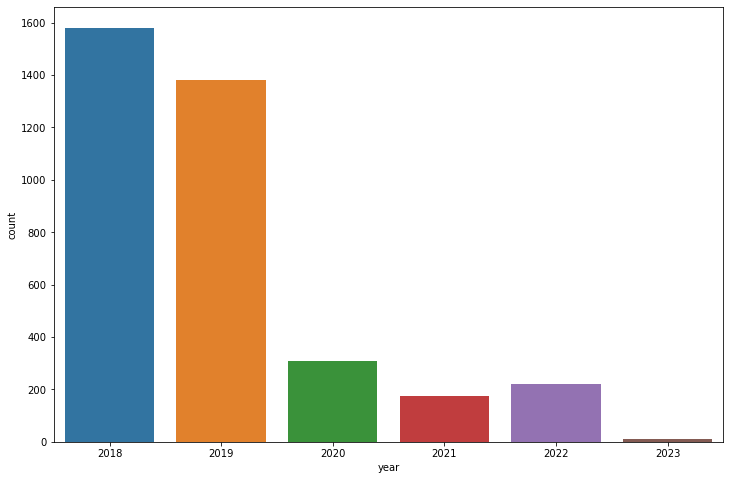

In [53]:
plt.figure(figsize=(12,8))
sns.countplot(x='year',data=review10, order = ['2018','2019','2020','2021','2022','2023'])

### 여행을 제일 많이 한 달은?

<AxesSubplot:xlabel='month', ylabel='count'>

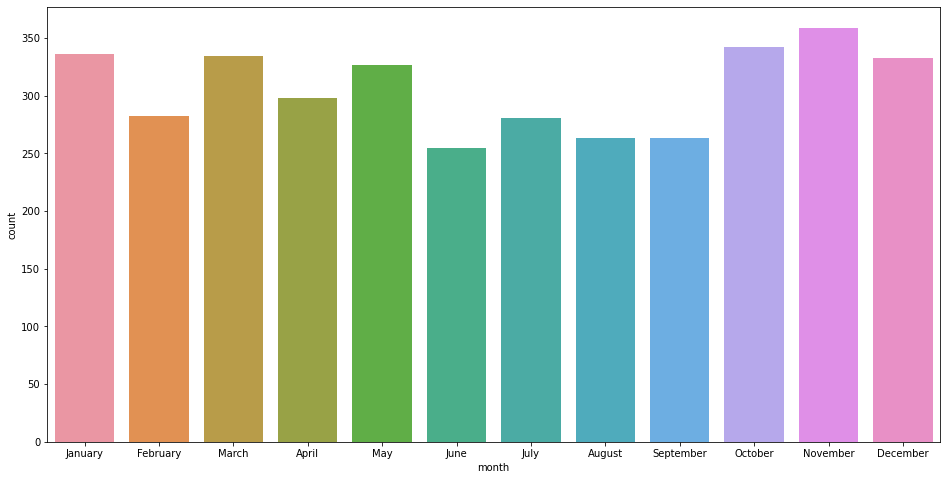

In [55]:
plt.figure(figsize=(16,8))
month_list = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(x='month',data=review10, order = month_list)

In [56]:
print('2018: ', len(review10[review10['date of stay'].str.contains('2018')]))
print('2019: ', len(review10[review10['date of stay'].str.contains('2019')]))
print('2020: ', len(review10[review10['date of stay'].str.contains('2020')]))
print('2021: ', len(review10[review10['date of stay'].str.contains('2021')]))
print('2022: ', len(review10[review10['date of stay'].str.contains('2022')]))
print('2023: ', len(review10[review10['date of stay'].str.contains('2023')]))

2018:  1581
2019:  1380
2020:  309
2021:  175
2022:  219
2023:  9


In [74]:
review10.shape

(3673, 14)

[Text(0, 0, 'HOTEL THE FLAG Shinsaibashi'),
 Text(1, 0, 'Conrad Osaka'),
 Text(2, 0, 'Hotel Universal Port Vita'),
 Text(3, 0, 'Fraser Residence Nankai Osaka'),
 Text(4, 0, 'InterContinental Hotel Osaka'),
 Text(5, 0, 'The Bridge Hotel Shinsaibashi'),
 Text(6, 0, 'karaksa hotel Osaka Namba'),
 Text(7, 0, 'Marriott Osaka Miyako Hotel'),
 Text(8, 0, 'Imperial Hotel Osaka'),
 Text(9, 0, 'Cross Hotel Osaka')]

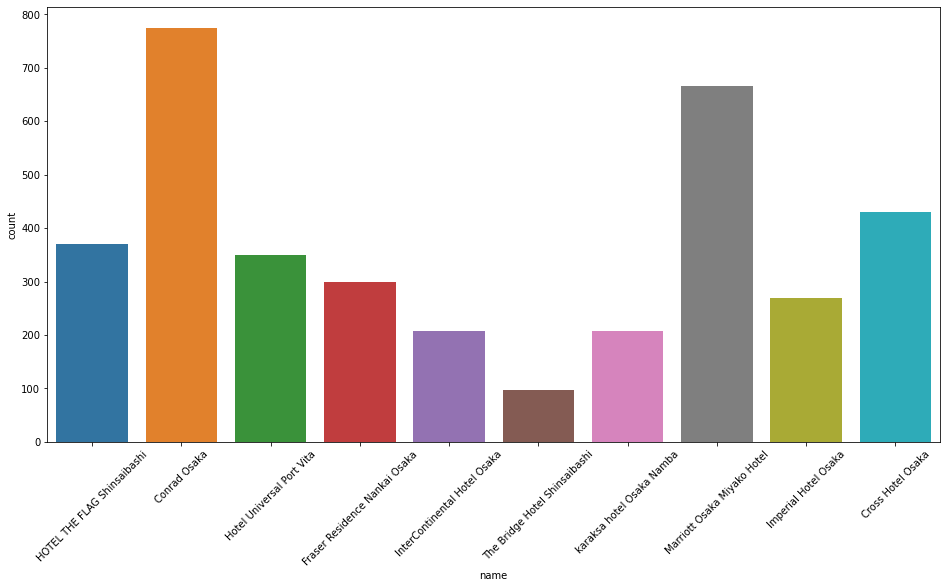

In [61]:
plt.figure(figsize=(16,8))
pal = sns.countplot(x='name',data=review10)
pal.set_xticklabels(pal.get_xticklabels(), rotation=45)

In [71]:
review10[review10['name']=='Marriott Osaka Miyako Hotel'].head(1)

name  rating         id              country  \
2621  Marriott Osaka Miyako Hotel       1  anosj1127  Tondabayashi, Japan   

     country2         title  \
2621    Japan  アフタヌーンティーが最悪   

                                                 review type translation  \
2621  ホテルは景色も良くアメニティも設備も満足のいくものでしたが今アリスのアフタヌーンティーは驚く...  NaN           G   

      votes   date of stay  ranking  year     month  
2621   52.0  December 2022        8  2022  December

In [62]:
review10['name'].unique()

array(['HOTEL THE FLAG Shinsaibashi', 'Conrad Osaka',
       'Hotel Universal Port Vita', 'Fraser Residence Nankai Osaka',
       'InterContinental Hotel Osaka', 'The Bridge Hotel Shinsaibashi',
       'karaksa hotel Osaka Namba', 'Marriott Osaka Miyako Hotel',
       'Imperial Hotel Osaka', 'Cross Hotel Osaka'], dtype=object)

### review 텍스트 전처리

In [ ]:
# https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model

In [4]:
eng_re = review10[review10['translation']=='E']
eng_re.shape

(2177, 12)

In [11]:
print('2018: ', len(eng_re[eng_re['date of stay'].str.contains('2018')]))
print('2019: ', len(eng_re[eng_re['date of stay'].str.contains('2019')]))
print('2020: ', len(eng_re[eng_re['date of stay'].str.contains('2020')]))
print('2021: ', len(eng_re[eng_re['date of stay'].str.contains('2021')]))
print('2022: ', len(eng_re[eng_re['date of stay'].str.contains('2022')]))
print('2023: ', len(eng_re[eng_re['date of stay'].str.contains('2023')]))

2018:  840
2019:  781
2020:  106
2021:  22
2022:  95
2023:  6


In [8]:
eng_re['country2'].value_counts()

USA                     418
Australia               268
Singapore               199
United Kingdom          166
China                   155
Canada                   70
Philippines              55
Japan                    50
Thailand                 30
Malaysia                 25
Indonesia                24
Hong Kong                23
Taiwan                   20
New Zealand              17
Switzerland              17
France                   14
Israel                   13
Germany                  13
Belgium                  12
United Arab Emirates     12
India                    11
Italy                    10
Netherland               10
South Korea               9
Spain                     9
Portugal                  4
Qatar                     3
Asia                      3
Brazil                    3
Bulgaria                  3
Denmark                   3
Scotland                  3
Norway                    3
South Africa              3
Chile                     2
Finland             

In [44]:
import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [46]:
eng_re['review'] = eng_re['review'].apply(lambda x:clean_text(x))
eng_re.head()

C:\Users\katenam\AppData\Local\Temp\ipykernel_25940\1852587009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_re['review'] = eng_re['review'].apply(lambda x:clean_text(x))


name  rating                 id  \
1  HOTEL THE FLAG Shinsaibashi       5        AnthonyChng   
2  HOTEL THE FLAG Shinsaibashi       5            Jacek B   
3  HOTEL THE FLAG Shinsaibashi       5            Jayd822   
4  HOTEL THE FLAG Shinsaibashi       5  Harald Gracholski   
5  HOTEL THE FLAG Shinsaibashi       5          Librilisa   

                country        country2  \
1  Singapore, Singapore       Singapore   
2      Katowice, Poland          Poland   
3                    SA       Australia   
4      Cologne, Germany         Germany   
5        United Kingdom  United Kingdom   

                                               title  \
1                               Second Time in Osaka   
2                        Amazing hotel, lovely staff   
3                                  Highly recommend!   
4                   Best possible location in Osaka!   
5  Modern, Funky Hotel with Great Amenities - AMA...   

                                              review                    type  \
1  great stay everything is new and nice bath is ...    Traveled with family   
2  our stay at this hotel was one of the best wev...    Traveled as a couple   
3  really enjoyed our stay at this modern funky h...   Traveled with friends   
4  the flag in shinsaibashi was probably the most...                     NaN   
5  this seems like a newer hotel as everything lo...                     NaN   

  translation  votes   date of stay  ranking  
1           E    4.0  December 2022        1  
2           E    NaN  November 2022        1  
3           E   79.0  February 2020        1  
4           E  529.0  November 2019        1  
5           E   15.0     March 2020        1

### Most common words

In [48]:
from collections import Counter

eng_re['temp_list'] = eng_re['review'].apply(lambda x:str(x).split())
top = Counter([item for sublist in eng_re['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

C:\Users\katenam\AppData\Local\Temp\ipykernel_25940\1532163083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_re['temp_list'] = eng_re['review'].apply(lambda x:str(x).split())


### 불용어 제거

In [50]:
import nltk
from nltk.corpus import stopwords

def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
eng_re['temp_list'] = eng_re['temp_list'].apply(lambda x:remove_stopword(x))

C:\Users\katenam\AppData\Local\Temp\ipykernel_25940\316965762.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_re['temp_list'] = eng_re['temp_list'].apply(lambda x:remove_stopword(x))


In [51]:
top = Counter([item for sublist in eng_re['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

In [80]:
spwords = set(STOPWORDS)  # 제외할 단어
spwords.add('hotel')




NameError: name 'STOPWORDS' is not defined